In [3]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage as ndi
from skimage.filters import threshold_yen

In [4]:
im = cv2.imread('test_image.tif')
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

## Thresholding

Using a high threshold to binarize the image will lead to better separated fibers but will leaves white spots in them which can make segmentation techniques using on the thresholded method less efficient.

Here are different thresholded images using thresholds like $m.threshold_{yen}$

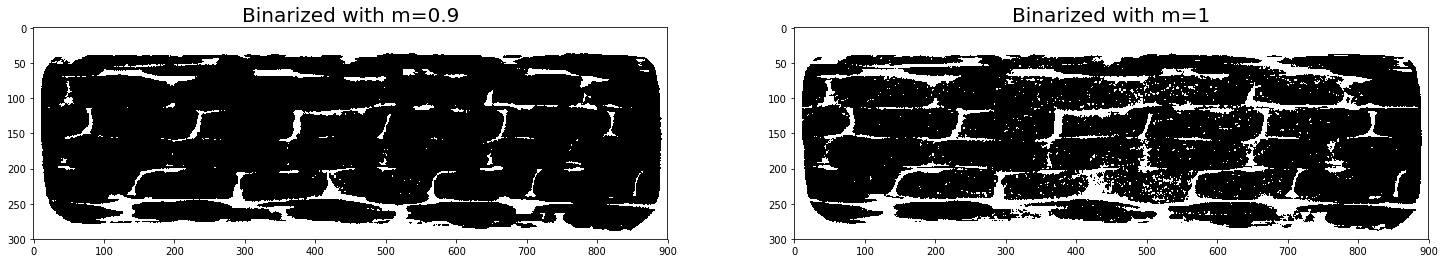

In [18]:
coef1 = 0.9
coef2 = 1

thresh = threshold_yen(gray)
binary1 = gray > thresh*coef1
binary2 = gray > thresh*coef2

f, (ax1,ax2) = plt.subplots(1,2,figsize=(25,25))
ax1.set_title('Binarized with m={}'.format(coef1),size=20)
ax1.imshow(binary1,cmap='Greys')
ax2.set_title('Binarized with m={}'.format(coef2),size=20)
ax2.imshow(binary2,cmap='Greys')

## Closing

Using Morphological closing we can use higher threshold, therfore better separation between fibers, while not having too many white dots.
Morphological closing dilates the black parts and then erodes the edges of the dilated black parts.

We try to achieve the same fiber separation as the one with a threshold = Threshold_yen while having the same amount of white dots as the one with threshold = 0.9*threshold_yen

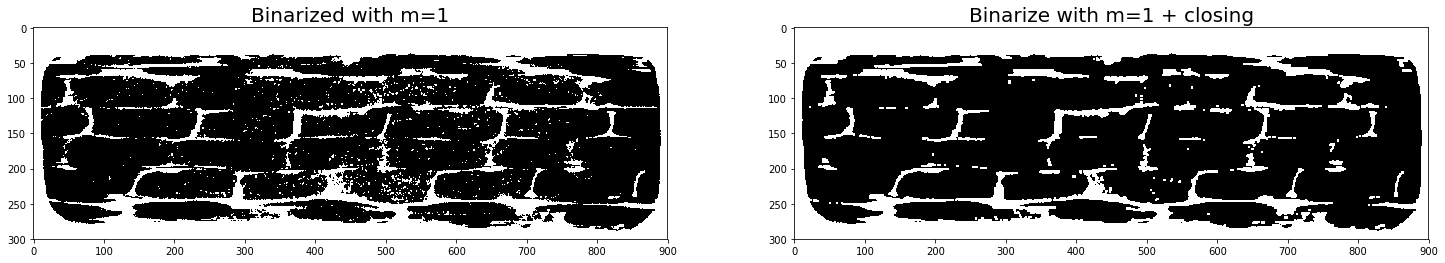

In [31]:
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(np.uint8(binary2),cv2.MORPH_CLOSE,kernel)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(25,25))
ax1.set_title('Binarized with m={}'.format(coef2),size=20)
ax1.imshow(binary2,cmap='Greys')
ax2.set_title('Binarize with m={} + closing'.format(coef2),size=20)
ax2.imshow(closing,cmap='Greys')